# NLP lab

The purpose of todays lab is to calculate and validate the customer sentiment (polarity) based on reviews of purchased womens clothing, as an introduction to using NLP techniques on text data and retrieving actionable data insights per department / division at the womens clothing company.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from textblob import TextBlob
import numpy as np

### 1. Get data

In [2]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### 2. Filter the data frame to a relevant subset of columns required for our data scenario

In [3]:
df = df[['Title', 'Review Text', 'Rating', 'Division Name', 'Department Name']]
df.head()

,Title,Review Text,Rating,Division Name,Department Name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops


### 3. Standardise your column headers

In [4]:
df.columns = [column.lower() for column in df.columns]

In [5]:
df.head()

,title,review text,rating,division name,department name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops


### 4. EDA

In [6]:
df.describe()

,rating
count,23486.000000
mean,4.196032
std,1.110031
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [7]:
df.shape

(23486, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19676 non-null  object
 1   review text      22641 non-null  object
 2   rating           23486 non-null  int64 
 3   division name    23472 non-null  object
 4   department name  23472 non-null  object
dtypes: int64(1), object(4)
memory usage: 917.5+ KB


In [9]:
df.isnull().sum()*100/len(df)

title              16.222430
review text         3.597888
rating              0.000000
division name       0.059610
department name     0.059610
dtype: float64

In [10]:
df = df.dropna(axis=0, subset=['review text'])

### 5. Summarise the average rating by division and department as a new dataframe

In [11]:
df1 = df.groupby(['division name', 'department name'], as_index=False)['rating'].mean()
df1

,division name,department name,rating
0,General,Bottoms,4.260727
1,General,Dresses,4.150318
2,General,Jackets,4.225962
3,General,Tops,4.136778
4,General,Trend,3.852632
5,General Petite,Bottoms,4.315226
6,General Petite,Dresses,4.122328
7,General Petite,Intimate,4.242291
8,General Petite,Jackets,4.301587
9,General Petite,Tops,4.197520


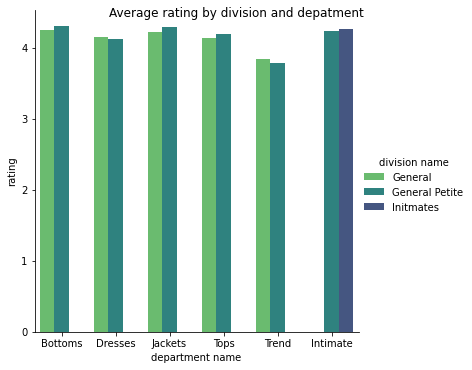

In [12]:
ax = sns.catplot(x="department name", y="rating", hue="division name", kind="bar", data=df1, ci="sd", palette="viridis_r")
ax.fig.suptitle("Average rating by division and depatment");

### 6. Do a spot /sample check on the review column, index position 5 to apply textblob over the selected review text

In [13]:
comment = TextBlob(df.at[5, 'review text'])
comment

TextBlob("I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.")

In [14]:
comment.sentiment

Sentiment(polarity=0.17874999999999996, subjectivity=0.533125)

In [15]:
comment2 = TextBlob(df.at[15, 'review text'])
comment2

TextBlob("I took these out of the package and wanted them to fit so badly, but i could tell before i put them on that they wouldn't. these are for an hour-glass figure. i am more straight up and down. the waist was way too small for my body shape and even if i sized up, i could tell they would still be tight in the waist and too roomy in the hips - for me. that said, they are really nice. sturdy, linen-like fabric, pretty color, well made. i hope they make someone very happy!")

In [16]:
comment2.sentiment

Sentiment(polarity=0.1665873015873016, subjectivity=0.5941269841269842)

In [17]:
comment3 = TextBlob(df.at[3, 'review text'])
comment3

TextBlob("I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!")

In [18]:
comment3.sentiment

Sentiment(polarity=0.5499999999999999, subjectivity=0.625)

###  7. For the any selected customer review, use textblob to break out the text into sentences

In [19]:
comment3.sentences

[Sentence("I love, love, love this jumpsuit."),
 Sentence("it's fun, flirty, and fabulous!"),
 Sentence("every time i wear it, i get nothing but great compliments!")]

In [20]:
comment.sentences

[Sentence("I love tracy reese dresses, but this one is not for the very petite."),
 Sentence("i am just under 5 feet tall and usually wear a 0p in this brand."),
 Sentence("this dress was very pretty out of the package but its a lot of dress."),
 Sentence("the skirt is long and very full so it overwhelmed my small frame."),
 Sentence("not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment."),
 Sentence("i love the color and the idea of the style but it just did not work on me."),
 Sentence("i returned this dress.")]

### 8. Remove any rows in your data which contain have null in the review column

In [21]:
df.isnull().sum()

title              2966
review text           0
rating                0
division name        13
department name      13
dtype: int64

I already did it ;)

In [22]:
df.shape

(22641, 5)

### 9. Define a function with lambda (or other preferred method) to calculate sentiment polarity for each row of the filtered review data set, as a new column on the data frame.

In [23]:
def sentiment(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

In [24]:
df['polarity'] = df['review text'].apply(sentiment).apply(lambda x: x[0])
df.head()

,title,review text,rating,division name,department name,polarity
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,0.633333
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,0.339583
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,0.073675
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,0.550000
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,0.512891


### 10. Summarise the minimum review polarity, by division and department as a new dataframe

In [25]:
df_polarity = df.groupby(['division name', 'department name'], as_index=False)['polarity'].min()
df_polarity

,division name,department name,polarity
0,General,Bottoms,-0.533333
1,General,Dresses,-0.916667
2,General,Jackets,-0.750000
3,General,Tops,-0.975000
4,General,Trend,-0.270833
5,General Petite,Bottoms,-0.257778
6,General Petite,Dresses,-0.400000
7,General Petite,Intimate,-0.575000
8,General Petite,Jackets,-0.562500
9,General Petite,Tops,-0.700000


### 11. Visualise this summary as a simple sorted bar chart 

In [26]:
df_polarity_sort = df.groupby(['division name', 'department name'])['polarity'].min().sort_values()

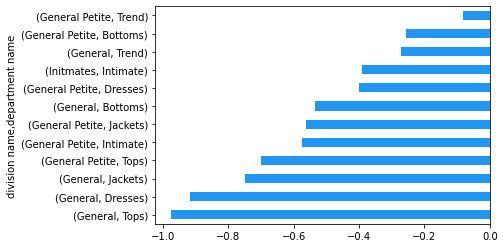

In [27]:
df_polarity_sort.plot(kind='barh', color='#2196f3');

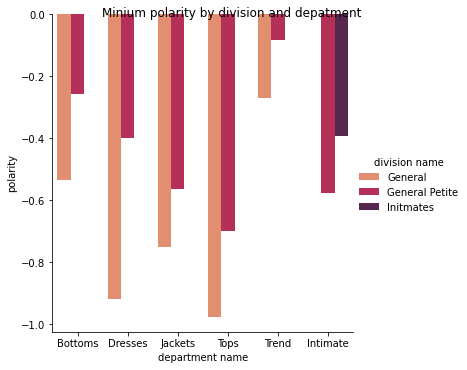

In [28]:
#try also in a fancier sns plot
ax = sns.catplot(x="department name", y="polarity", hue="division name", kind="bar", data=df_polarity, ci="sd", palette="rocket_r")
ax.fig.suptitle("Minium polarity by division and depatment");

### 12. Summarise the average review polarity, by division and department as a new dataframe

In [29]:
df_avg_pol = df.groupby(['division name', 'department name'], as_index=False)['polarity'].mean()
df_avg_pol

,division name,department name,polarity
0,General,Bottoms,0.245849
1,General,Dresses,0.251091
2,General,Jackets,0.237141
3,General,Tops,0.247025
4,General,Trend,0.203986
5,General Petite,Bottoms,0.259258
6,General Petite,Dresses,0.248380
7,General Petite,Intimate,0.239517
8,General Petite,Jackets,0.241773
9,General Petite,Tops,0.256835


### 13. Visualise this summary as a simple sorted bar chart

In [30]:
df_avg_pol_sort= df.groupby(['division name', 'department name'])['polarity'].mean().sort_values()

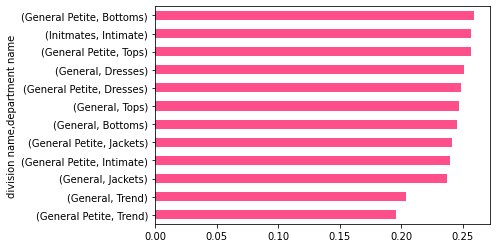

In [31]:
df_avg_pol_sort.plot(kind='barh', color='#ff4f8b');

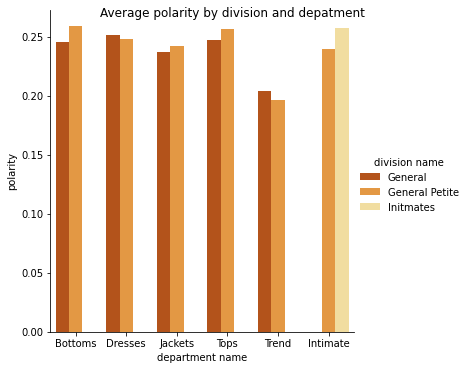

In [32]:
ax = sns.catplot(x="department name", y="polarity", hue="division name", kind="bar", data=df_avg_pol, ci="sd", palette="YlOrBr_r")
ax.fig.suptitle("Average polarity by division and depatment");